c:\Users\abdel\langgraph-video\FreeCodeCamp\3-SequentialGraph\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


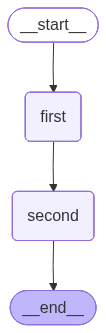

{'name': 'lol', 'age': '21', 'final': 'Hi, lol! Your are 21 years old!'}

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph


class AgentState(TypedDict):
    name : str
    age : str
    final : str
    
    
    
# first node we will build
def first_node(state : AgentState)-> AgentState:
    """This is the first node of our sequence"""

    state['final'] = f"Hi, {state['name']}! "
    return state

def second_node(state : AgentState)-> AgentState:
    """This is the second node of our sequence"""
    state['final'] = state['final'] + f"Your are {state['age']} years old!"
    return state



# create a graph
graph = StateGraph(AgentState)

# add the two nodes
graph.add_node("first", first_node)
graph.add_node("second", second_node)

# set start and end points
graph.set_entry_point("first")
graph.add_edge("first", "second")
# graph.add_edge("second", "first")
graph.set_finish_point("second")

app = graph.compile()


from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

app.invoke({"name" : "lol", "age" : "21"})